In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("GlobalWeatherRepository.csv", parse_dates=["last_updated"])
# , "sunrise",	"sunset","moonrise",	"moonset"
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47352,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1736934300,2025-01-15 05:45:00,15.5,60.0,Light rain,...,2.590,2.960,1,1,06:50 AM,06:24 PM,08:11 PM,08:15 AM,Waning Gibbous,98
47353,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1736936100,2025-01-15 17:15:00,23.1,73.6,Sunny,...,68.635,69.005,4,9,06:36 AM,05:36 PM,06:57 PM,07:41 AM,Waning Gibbous,99
47354,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1736937000,2025-01-15 13:30:00,18.9,66.0,Sunny,...,26.455,69.745,2,3,06:33 AM,05:52 PM,07:23 PM,07:45 AM,Waning Gibbous,99
47355,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1736937000,2025-01-15 12:30:00,28.0,82.4,Partly Cloudy,...,15.355,15.355,1,2,05:48 AM,06:44 PM,08:13 PM,07:00 AM,Waning Gibbous,99


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47357 entries, 0 to 47356
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       47357 non-null  object        
 1   location_name                 47357 non-null  object        
 2   latitude                      47357 non-null  float64       
 3   longitude                     47357 non-null  float64       
 4   timezone                      47357 non-null  object        
 5   last_updated_epoch            47357 non-null  int64         
 6   last_updated                  47357 non-null  datetime64[ns]
 7   temperature_celsius           47357 non-null  float64       
 8   temperature_fahrenheit        47357 non-null  float64       
 9   condition_text                47357 non-null  object        
 10  wind_mph                      47357 non-null  float64       
 11  wind_kph                    

In [6]:
andorra = data[data["country"] == "Andorra"]

In [25]:
cols = ["temperature_celsius", "wind_kph", "precip_mm", "humidity", "cloud"]
andorra[cols]

,temperature_celsius,wind_kph,precip_mm,humidity,cloud
3,6.3,11.9,0.30,61,100
198,6.3,10.1,0.22,76,76
393,9.7,10.8,0.07,57,80
586,13.0,16.9,0.03,42,72
779,11.5,12.2,0.69,69,56
...,...,...,...,...,...
46385,2.7,11.5,1.96,94,78
46580,-4.1,17.3,0.00,52,0
46775,0.3,14.0,0.00,25,0
46970,5.6,6.8,0.00,19,5


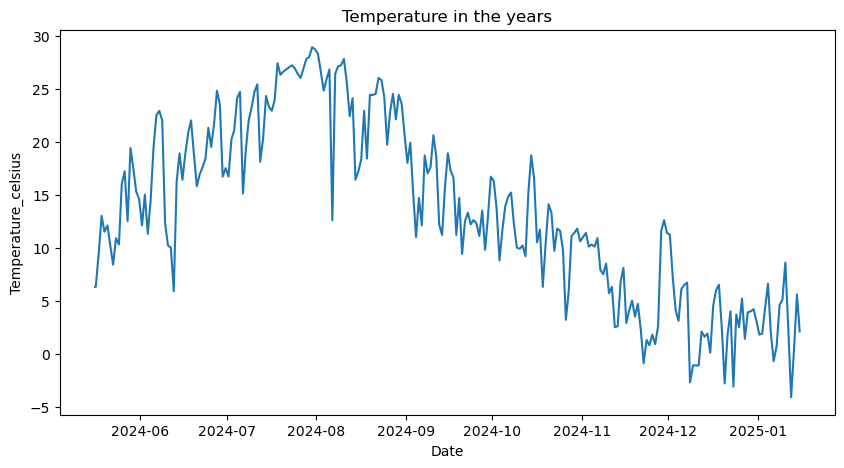

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(andorra["last_updated"], andorra["temperature_celsius"])
ax.set_ylabel("Temperature_celsius")
ax.set_xlabel("Date")
ax.set_title("Temperature in the years")
plt.show()

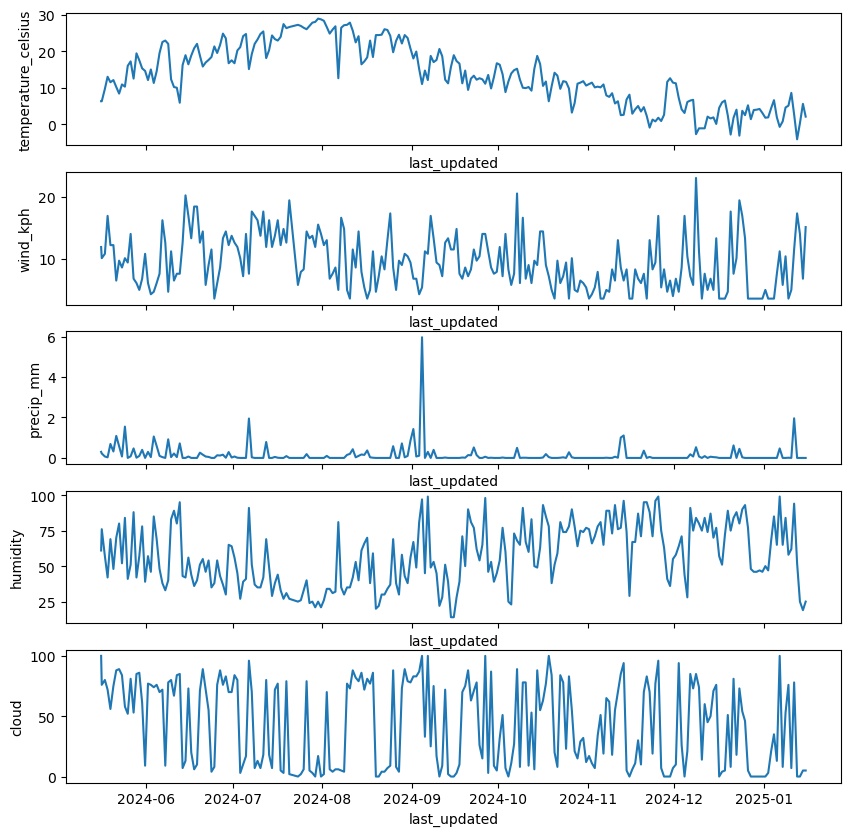

In [29]:

fig, axs = plt.subplots(len(cols),1, figsize=(10,10), sharex= True)

for i, k in enumerate(cols):
    axs[i].plot(andorra["last_updated"], andorra[k])
    axs[i].set_xlabel("last_updated") 
    axs[i].set_ylabel(k)  
    
plt.show() 
    

In [57]:
# nazione più calda, più fredda, più umida, meno umida e la media

media_temp = data[["country","temperature_celsius"]].groupby("country").mean()
media_temp.sort_values("temperature_celsius", ascending= False).head(3)



,temperature_celsius
country,
Saudi Arabien,45.0
Marrocos,40.3
Turkménistan,37.8


In [58]:
media_temp = data[["country","temperature_celsius"]].groupby("country").mean()
media_temp.sort_values("temperature_celsius", ascending= True).head(3)

,temperature_celsius
country,
Mongolia,4.001235
Iceland,6.430738
United States of America,9.279916


In [61]:
media_hum = data[["country","humidity"]].groupby("country").mean()
media_hum.sort_values("humidity", ascending= False).head(3)

,humidity
country,
Гватемала,95.0
Lao People's Democratic Republic,95.0
كولومبيا,95.0


In [60]:
media_hum = data[["country","humidity"]].groupby("country").mean()
media_hum.sort_values("humidity", ascending= True).head(3)

,humidity
country,
Saudi Arabien,7.0
Turkménistan,11.0
Marrocos,14.0


In [62]:
# Quante volte c'è nebbia per ogni nazione
data["condition_text"].unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers',
       'Light freezing rain', 'Heavy snow', 'Blowing snow',
       'Patchy heavy snow', 'Light snow showers',
       'Moderate or heavy sleet', 'Patchy light snow',
       'Patchy mo

In [95]:
nebbia = data[(data["condition_text"] == "fog") | (data["condition_text"] == "Fog")] 
nebbia_paese = nebbia["country"].value_counts()
nebbia_paese.to_csv("./ris_nebbia.csv")